## Instalación de OpenMC

In [0]:
#
# Executing this cell you will install OpenMC and the nuclear
# data libraries in this instance of the Google Colaboratory virtual machine.
# The process takes about 2 minutes.
#

def install_openmc():
  #
  # Clone source code from Github, make and install
  #
  
  import os
  
  if not os.path.isdir('/content'):
    print("Esta función instala OpenMC en una instancia de Google Colaboratory.")
    print("Para instalar localmente siga las instrucciones de la documentacion:")
    print("http://docs.openmc.org/en/stable/quickinstall.html")
    return
  
  %cd -q /content
  print("Obtaining OpenMC source code from Github...")
  !git  --no-pager clone https://github.com/mit-crpg/openmc.git &> /dev/null
  %cd -q openmc
  !git --no-pager checkout master &> /dev/null
  !mkdir build
  %cd -q build
  print("Running cmake...")
  !cmake ../ -DPYTHON_EXECUTABLE=/usr/bin/python3 -DCMAKE_INSTALL_PREFIX=/usr/local &> /dev/null
  print("Running make...")
  !make -j &> /dev/null
  print("Running make install...")
  !make install &> /dev/null
  import sys
  sys.path.append('/usr/local/lib/python3.6/dist-packages/openmc-0.10.0-py3.6-linux-x86_64.egg')
  sys.path.append('/usr/local/lib/python3.6/site-packages/')
  %cd -q /content

def install_data_from_onedrive():
  #
  # Download preprocessed HDF5 files from OneDrive (faster).
  #
  import os
  
  if not os.path.isdir('/content'):
    print("Esta función instala los datos nucleares de OpenMC en una instancia de Google Colaboratory.")
    print("Para instalar localmente siga las instrucciones de la documentacion:")
    print("http://docs.openmc.org/en/stable/quickinstall.html")
    return
  %cd -q /content
  print("Obtaining HDF5 files from OneDrive...")
  !wget -O nndc_hdf5.tar.gz "https://onedrive.live.com/download?cid=22422A8EEA2A85B9&resid=22422A8EEA2A85B9%21105&authkey=AHL6xwYFXDwEzkk" &> /dev/null
  print("Uncompressing...")
  !tar xzvf nndc_hdf5.tar.gz &> /dev/null
    
from time import time
t1 = time()
install_openmc()
install_data_from_onedrive()
t2 = time()
print("Installed OpenMC in {:.2f} minutes".format((t2-t1)/60.0))


# Ejemplo: benchmark Godiva.

Realizaremos la simulación del reactor [Godiva](https://en.wikipedia.org/wiki/Godiva_device). Los detalles de este reactor pueden encontrarse en el benchmark HEU-MET-FAST-001 de [ICSBEP](https://www.oecd-nea.org/science/wpncs/icsbep/) y también en el informe "S. Frankle. A Suite of Criticality Benchmarks for Validating Nuclear Data. LA-13594 (1999)", [disponible en la base de datos INIS de IAEA](https://inis.iaea.org/search/search.aspx?orig_q=RN:32027510). 

 <p align="center">
<img src="https://upload.wikimedia.org/wikipedia/commons/2/2a/Godiva-before-scrammed.jpg">
</p>


Godiva es una esfera de $8.7407$ cm de radio de uranio metálico de densidad $18.74$ gm/cm$^3$, $94.73$ % en peso de $^{235}$U, $5.27$ % en peso de $^{238}$U, y $1.02$ % en peso de $^{234}$U.

In [0]:
import openmc

umet = openmc.Material()
umet.add_nuclide("U235", 0.9473, 'wo')
umet.add_nuclide("U238", 0.0527, 'wo')
umet.add_nuclide("U234", 0.0102, 'wo')
umet.set_density("g/cm3", 18.74)

mats = openmc.Materials([umet])
mats.cross_sections = "/content/nndc_hdf5/cross_sections.xml"
mats.export_to_xml()

esfera = openmc.Sphere(R=8.74, boundary_type="vacuum")
godiva = openmc.Cell(region = -esfera, fill=umet)
simulacion = openmc.Universe(cells=[godiva])

geom = openmc.Geometry(simulacion)
geom.export_to_xml()

run = openmc.Settings()
run.run_mode = "eigenvalue"
run.particles = 10000
run.batches = 110
run.inactive = 10
run.export_to_xml()

!rm statepoint*.h5
!rm summary.h5
openmc.run()


                               %%%%%%%%%%%%%%%
                          %%%%%%%%%%%%%%%%%%%%%%%%
                       %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                     %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                  %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                   %%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                ###############      %%%%%%%%%%%%%%%%%%%%%%%%
               ##################     %%%%%%%%%%%%%%%%%%%%%%%
               ###################     %%%%%%%%%%%%%%%%%%%%%%%
               ####################     %%%%%%%%%%%%%%%%%%%%%%
               #####################     %%%%%%%%%%%%%%%%%%%%%
               ######################     %%%%%%%%%%%%%%%%%%%%
               #######################     %%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%

0

Populating the interactive namespace from numpy and matplotlib


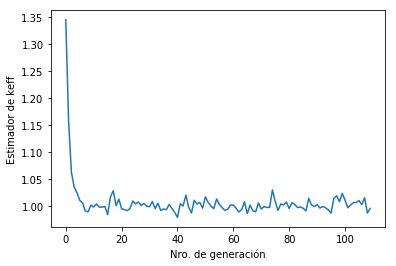

In [0]:
% pylab inline
estado = openmc.StatePoint("statepoint.110.h5")
keff = estado.k_generation
a = plot(keff)
a = xlabel("Nro. de generación")
a = ylabel("Estimador de keff")